In [24]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import pypokedex
import glob
import re

In [5]:
# Load all the files relevant for the project
image_folder = '../datasets/raw/renders_2d/images'
metadata = pd.read_csv('../datasets/raw/renders_3d/pokemon.csv')
image_paths = glob.glob(f'{image_folder}/*.png')

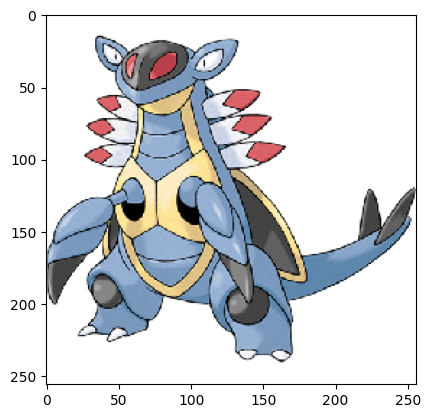

In [8]:
# Display the first image
img = mpimg.imread(image_paths[0])
imgplot = plt.imshow(img)

In [53]:
# Pair the images with the metadata
names, images, type1, type2, dex = [], [], [], [], []
for image in image_paths:
    img = image
    image = image.split('/')[-1].split('.')[0]
    if '-' in image:
        image = image.split('-')[0]
    if len(image) >= 3:
        image = image[:3]
    pokemon = pypokedex.get(dex=int(image))
    names.append(pokemon.name)
    images.append(img)
    ptype = pokemon.types
    if len(ptype) > 1:
        type1.append(ptype[0])
        type2.append(ptype[1])
    else:
        type1.append(ptype[0])
        type2.append('')
    dex.append(pokemon.dex)

In [62]:
df = pd.DataFrame({'name': names, 'image': images, 'type1': type1, 'type2': type2, 'dex': dex})
df.sort_values(by='dex', inplace=True);df.reset_index(drop=True, inplace=True)

In [65]:
df.to_csv('../datasets/processed/pokemon.csv', index=False)